# SI221 - TP K-nearest neighbors

### Données

Nous allons travailler sur des images de chiffres manuscrits (de 0 à 9), provenant du dataset MNIST. Ces images, de 28$\times$28 pixels, sont présentées comme des vecteurs lignes d'entiers compris entre $0$ et $255$. On y associe des étiquettes, indiquant quel est le chiffre représenté sur l'image (ici, l'étiquette correspondant au chiffre '0' est '10'. 

In [12]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [13]:
# Careful, we need to convert the data to float - if we keep the encoding as 8-bit integer,
# we will certainly have issues when applying numpy functions to the data 
train_data = scipy.io.loadmat('data_app.mat')['x'].astype(np.float)
test_data = scipy.io.loadmat('data_test.mat')['x'].astype(np.float)

C:\Users\quent\AppData\Local\Temp\ipykernel_12880\374685871.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_data = scipy.io.loadmat('data_app.mat')['x'].astype(np.float)
C:\Users\quent\AppData\Local\Temp\ipykernel_12880\374685871.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_data = scipy.io.loadmat('data_test.mat')['x

In [14]:
train_labels = scipy.io.loadmat('data_app.mat')['S'].reshape(-1)
test_labels = scipy.io.loadmat('data_test.mat')['S'].reshape(-1)

Quelle est la taille de l’ensemble d’entraînement et de l’ensemble de test ? Les exemples
sont-ils équirépartis suivant les classes ? Affichez les premières images de l'ensemble d'entraînement ainsi que les étiquettes correspondantes. 

In [15]:
print("Taille de l'ensemble d'entraînement :", train_data.shape)
print("Taille de l'ensemble de test :", test_data.shape)


unique_train, counts_train = np.unique(train_labels, return_counts=True)
print("Distribution des classes dans l'ensemble d'entraînement :")
print(dict(zip(unique_train, counts_train)))

unique_test, counts_test = np.unique(test_labels, return_counts=True)
print("Distribution des classes dans l'ensemble de test :")
print(dict(zip(unique_test, counts_test)))


Taille de l'ensemble d'entraînement : (1000, 784)
Taille de l'ensemble de test : (300, 784)
Distribution des classes dans l'ensemble d'entraînement :
{1: 116, 2: 99, 3: 93, 4: 105, 5: 92, 6: 94, 7: 117, 8: 87, 9: 100, 10: 97}
Distribution des classes dans l'ensemble de test :
{1: 38, 2: 28, 3: 28, 4: 38, 5: 24, 6: 25, 7: 34, 8: 31, 9: 32, 10: 22}


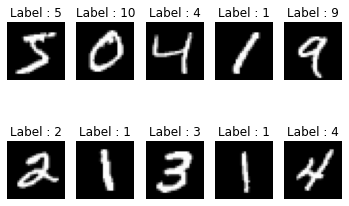

In [17]:
fig, axs = plt.subplots(2, 5)
for i in range(10):
    row = i // 5
    col = i % 5
    axs[row, col].imshow(train_data[i].reshape(28,28), cmap='gray')
    axs[row, col].set_title(f"Label : {train_labels[i]}")
    axs[row, col].axis('off')

plt.show()


Implémentez la méthode des $k$-plus proche voisins en prenant comme caractéristiques les valeurs des
pixels. On donnera, pour différentes valeurs du paramètre k (k=1, 3, 4, 5):
- Le taux d’erreur.
- La matrice de confusion - La matrice de confusion est une matrice de taille $10\times10$ dont l’élément d’indice (i,j) est le nombre de vecteurs de la classe i qui ont été affectés à la classe j par la méthode.
- Visualisez quelques confusions entre caractères.

In [24]:
k = 1

def knn(train_data,train_labels,test_data,k):
    predictions = np.zeros(test_data.shape[0], dtype=int)
    for i in range(test_data.shape[0]):
        distances = np.square(test_data[i] - train_data).sum(axis=1)
        indices = np.argsort(distances)
        labels = [train_labels[indice] for indice in indices[k:]]
        counts = np.bincount(labels)
        predictions[i] = np.argmax(counts)
    return predictions

In [25]:
# Prédire les étiquettes de test pour k = 1, 3, 4, 5
for k in [1, 3, 4, 5]:
    predictions = knn(train_data, train_labels, test_data, k)
    accuracy = np.mean(predictions == test_labels)
    confusion_matrix = np.zeros((10, 10), dtype=int)
    for i in range(10):
        for j in range(10):
            confusion_matrix[i, j] = np.sum((test_labels == i) & (predictions == j))
    print(f"k={k} | Accuracy={accuracy:.4f}")
    print(f"Confusion matrix:\n{confusion_matrix}\n")


k=1 | Accuracy=0.0100
Confusion matrix:
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  1  0  0  0  0  0 27  0  0]
 [ 0  0  0  0  0  0  0 28  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  0  0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0  0 25  0  0]
 [ 0 31  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0 31  0  0]
 [ 0  1  0  0  0  0  0 31  0  0]]

k=3 | Accuracy=0.0100
Confusion matrix:
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  1  0  0  0  0  0 27  0  0]
 [ 0  1  0  0  0  0  0 27  0  0]
 [ 0  1  0  0  0  0  0 37  0  0]
 [ 0  0  0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0  0 25  0  0]
 [ 0 31  0  0  0  0  0  3  0  0]
 [ 0  1  0  0  0  0  0 30  0  0]
 [ 0  3  0  0  0  0  0 29  0  0]]

k=4 | Accuracy=0.0133
Confusion matrix:
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  1  0  0  0  0  0 27  0  0]
 [ 0  1  0  0  0  0  0 27  0  0]
 [ 0  2  0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  

- Construisez des prototypes (au moins un par classe) à partir des images de l’ensemble d’apprentissage, et visualisez-les. Le prototype peut être par exemple la moyenne des exemples correspondants à chaque classe. 
- Classez les images de test en les comparant aux prototypes.
- Comparez avec les résultats obtenus précedemment.

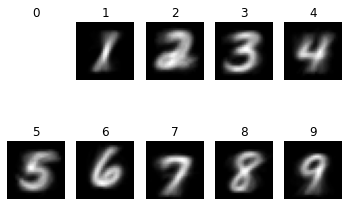

IndexError: index 10 is out of bounds for axis 0 with size 10

In [42]:
# Calcul des prototypes
prototypes = np.zeros((10, 784))
for i in range(10):
    prototypes[i] = np.mean(train_data[train_labels == i], axis=0)


fig, axs = plt.subplots(2, 5)
for i in range(10):
    ax = axs[i//5, i%5]
    ax.imshow(prototypes[i].reshape(28,28), cmap='gray')
    ax.set_title(str(i))
    ax.axis('off')
plt.show()


predicted_labels = np.zeros(len(test_labels))
for i in range(1,len(test_data)):
    distances = np.linalg.norm(test_data[i] - prototypes, axis=1)
    predicted_labels[i] = np.argmin(distances)


confusion_matrix = np.zeros((10, 10))
for i in range(1,len(test_labels)):
    confusion_matrix[test_labels[i], int(predicted_labels[i])] += 1

error_rate = 1 - np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)
print('Taux d\'erreur : {:.2f}%'.format(error_rate * 100))
print('Matrice de confusion :\n', confusion_matrix.astype(int))
